In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML, display_html
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv(r"C:\Users\HP\Documents\GitHub\Notes-and-Notebooks\reviews.csv")
df.head()

,listing_id,date
0,109,2011-08-15
1,109,2016-05-15
2,2708,2014-06-09
3,2708,2014-06-23
4,2708,2015-07-25


In [3]:
display(df.head())

,listing_id,date
0,109,2011-08-15
1,109,2016-05-15
2,2708,2014-06-09
3,2708,2014-06-23
4,2708,2015-07-25


In [9]:
df.shape

df.info()

display(df.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127456 entries, 0 to 1127455
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1127456 non-null  int64 
 1   date        1127456 non-null  object
dtypes: int64(1), object(1)
memory usage: 17.2+ MB


listing_id    False
date          False
dtype: bool

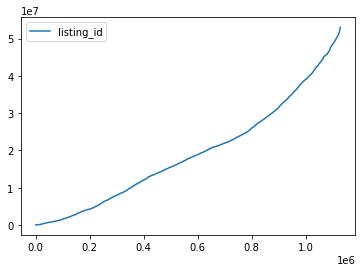

In [10]:
df.plot()

In [13]:
df =df.rename(columns = {'date':'ds', 'listing_id':'ts'})

df_example = df.groupby(by = 'ds').agg({'ts':'count'})

df_example.index = pd.to_datetime(df_example.index)

df_example = df_example.asfreq(freq = '1D')

df_example = df_example.sort_index(ascending= True)

df_example = df_example.fillna(value=0)

display(df_example.head())

,ts
ds,
2009-05-26,1.0
2009-05-27,0.0
2009-05-28,0.0
2009-05-29,0.0
2009-05-30,0.0


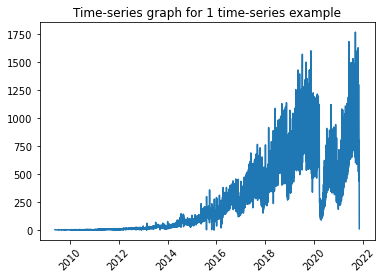

In [15]:
f, ax = plt.subplots(1,1)
ax.plot(df_example['ts'])

ax.set_title('Time-series graph for 1 time-series example')

ax.tick_params(axis = 'x', rotation = 45)

plt.show()
plt.close()

A stationary time series is one where the properties such as mean, variance, autocorrelation are all constant over time. Most statistical methods are based on the assumption that the time series can be rendered approximately stationary through the use of mathematical transformations. <br>
"If you live by the crystal ball you end up eating broken glass" <br>
One very basic test of your model is whether its errors really look like pure noise i.e independent and identically distributed random variables. If the errors are not pure noise, then by definition there is some pattern in them, and you could make them smaller by adjusting the model to explain that pattern.


The dickey fuller test is used to determine if the time series is stationary or not. We can usually eyeball it but when dealing with multiple time series we need a quantitative method to do that. <br>
The null hypothesis is that the time series is not stationary and we need sufficient statistical evidence to reject the null hypothesis.